In [37]:
# Import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [38]:
# Set file paths
city_path = 'raw_data/city_data.csv'
ride_path = 'raw_data/ride_data.csv'

# Read CSVs into data frames
city_df = pd.read_csv(city_path)
ride_df = pd.read_csv(ride_path)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [39]:
# Average fare per city
rides_group = ride_df.groupby("city", as_index=False)
avg_fare_city = rides_group["fare"].mean()

# Total number of rides per city
tot_rides_city = rides_group.count()
tot_rides_city = tot_rides_city.drop(["date", "ride_id"], axis=1)
tot_rides_city = tot_rides_city.rename(columns={"fare":"Count of Rides"})

# Total number of drivers per city
cities_group = city_df.groupby("city", as_index=False)
drivers_per_city = cities_group["driver_count"].sum()

In [47]:
# Combine fields into data frames

# first drop driver count from groupby object
city_type = city_df.drop(["driver_count"], axis=1)

# df1
plot_df1 = pd.merge(avg_fare_city, tot_rides_city, how='outer')

#df2
plot_df2 = pd.merge(drivers_per_city, city_type, how='outer')

# Combined df
plot_df = pd.merge(plot_df1, plot_df2, how='outer', on='city')

# rename column
plot_df = plot_df.rename(columns={"type": "City Type", 
                                  "city":"City",
                                  "fare":"Fare",
                                  "driver_count": "Count of Drivers",
})

plot_df.head()

,City,Fare,Count of Rides,Count of Drivers,City Type
0,Alvarezhaven,23.93,31,21,Urban
1,Alyssaberg,20.61,26,67,Urban
2,Anitamouth,37.32,9,16,Suburban
3,Antoniomouth,23.62,22,21,Urban
4,Aprilchester,21.98,19,49,Urban


In [41]:
# categorize data into new data frames by city type

# Urban
urban_df = plot_df.loc[plot_df["City Type"]=='Urban', :]

# Suburban
suburban_df = plot_df.loc[plot_df["City Type"]=='Suburban', :]

# Rural
rural_df = plot_df.loc[plot_df["City Type"]=='Rural', :]

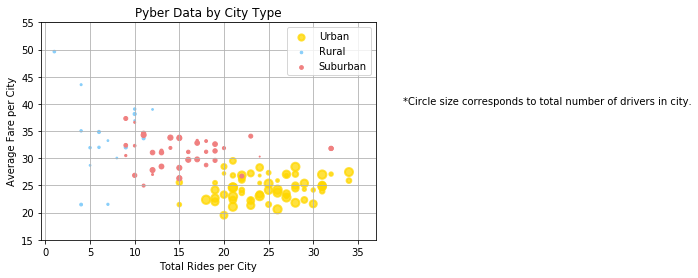

In [42]:
fig, ax = plt.subplots()
plt.scatter(x=urban_df['Count of Rides'], y=urban_df['Fare'], c='gold', alpha=0.75, s=urban_df['Count of Drivers'],label='Urban', linewidths=2)
plt.scatter(x=rural_df['Count of Rides'], y=rural_df['Fare'], c='lightskyblue', alpha=1, s=rural_df['Count of Drivers'], label='Rural')
plt.scatter(x=suburban_df['Count of Rides'], y=suburban_df['Fare'], c='lightcoral', alpha=1, s=suburban_df['Count of Drivers'], label='Suburban')
plt.legend(loc='best')
plt.xlabel("Total Rides per City")
plt.ylabel("Average Fare per City")
plt.title("Pyber Data by City Type")
plt.xlim(-0.5, 37)
plt.ylim(15, 55)
plt.text(40, 40, '*Circle size corresponds to total number of drivers in city.')
plt.grid()
plt.show()

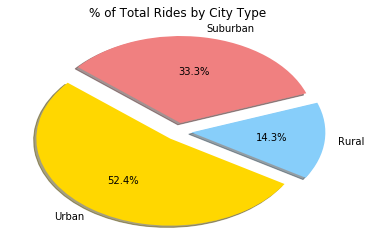

In [43]:
# Pie charts

# % of Total Rides by City Type
labels = ['Urban', 'Rural', 'Suburban']
sizes = [len(urban_df), len(rural_df), len(suburban_df)]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0.1, 0.1, 0.1]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()

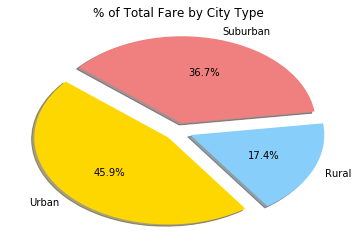

In [44]:
# % of Fare by City Type

labels = ['Urban', 'Rural', 'Suburban']
sizes = [urban_df["Fare"].sum(), rural_df["Fare"].sum(), suburban_df["Fare"].sum()]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0.1, 0.1, 0.1]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fare by City Type")
plt.show()

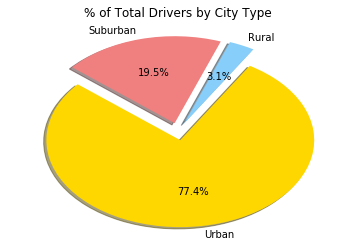

In [45]:
# % of Fare by City Type

labels = ['Urban', 'Rural', 'Suburban']
sizes = [urban_df["Count of Drivers"].sum(), rural_df["Count of Drivers"].sum(), suburban_df["Count of Drivers"].sum()]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0.1, 0.1, 0.1]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()